In [23]:
using Pkg
Pkg.activate("..")

using SoilDifferentialEquations
using Plots, Measures
pyplot(framestyle=:box)

  Activating project at `z:\GitHub\cug-hydro\SoilDifferentialEquations.jl`


Plots.PyPlotBackend()

In [24]:
z = 0.0:0.02:2;

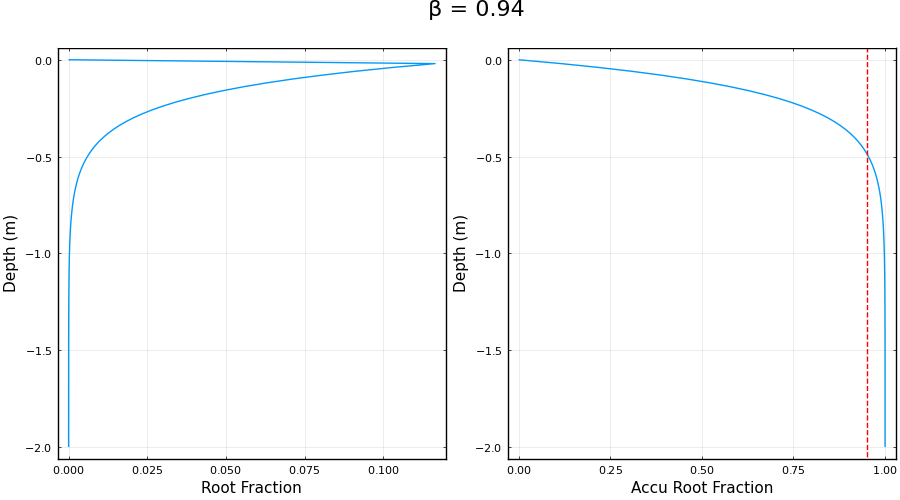

In [26]:
function plot_root(;β=0.94)
  ylabel = "Depth (m)"
  f_root = root_fraction(z * 100; β)
  p1 = plot(f_root, -z; label="", ylabel, xlabel="Root Fraction")
  p2 = plot(cumsum(f_root), -z; label="", ylabel, xlabel="Accu Root Fraction")
  vline!(p2, [0.95], color=:red, linestyle=:dash, linewidth=1, label="")
  plot(p1, p2, size=(900, 500), plot_title="β = $β", topmargin=0mm)
end

plot_root(β=0.94)


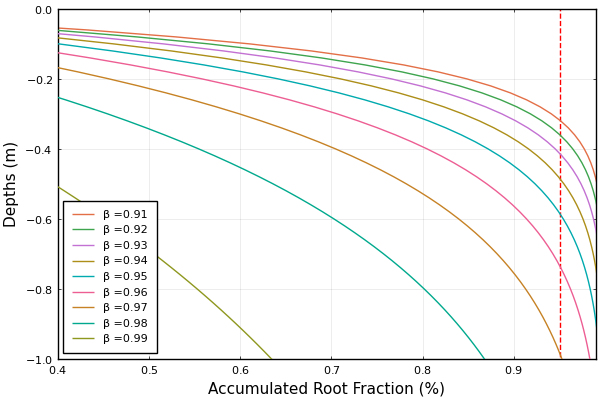

In [33]:
βs = [0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

p = plot(; legendposition=:bottomleft,
  xlim=(0.4, 0.99), ylim=(-1, 0),
  ylabel="Depths (m)", xlabel="Accumulated Root Fraction (%)")
vline!(p, [0.95], label=""; linestyle=:dash, color=:red)
for β in βs
  f_root = root_fraction(z * 100; β)
  y = cumsum(f_root)
  plot!(p, y, -z, label="β =$β")
end
p